In [296]:
from lib.utils import *
X,y = load_eeg_label_pair()

In [297]:
import pandas as pd
df = pd.read_csv(f'../data/alpha_sleep/0.csv')
df = df.drop(['label','emg','activity'],axis=1)

In [103]:
y = df['label']
X = df.drop('label',axis=1)

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.25)
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.nn.functional.one_hot(torch.from_numpy(pd.Categorical(y_train).codes).long()).float()
X_val = torch.from_numpy(X_val.to_numpy()).float()
y_val = torch.nn.functional.one_hot(torch.from_numpy(pd.Categorical(y_val).codes).long()).float()
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(pd.Categorical(y_test).codes).long()).float()

In [162]:
from lib.models import MLP
model = MLP(40).cuda()
import torch
from torch import nn
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
from torch.utils.data import TensorDataset,DataLoader
trainloader = DataLoader(TensorDataset(X_train,y_train),batch_size=64,shuffle=True)

100%|██████████| 100/100 [00:12<00:00,  7.80it/s]


tensor(0.6753)


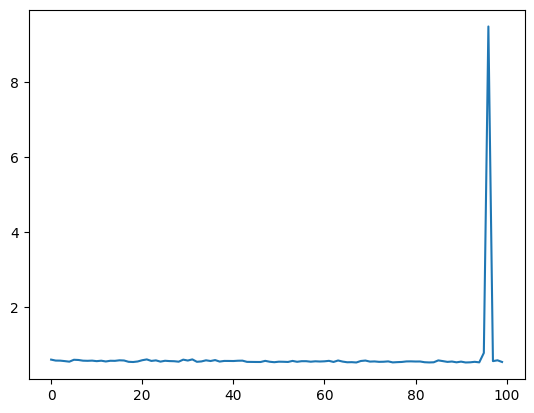

In [165]:
lossi = []

model.train()

for epoch in tqdm(range(100)):
    loss_total = 0
    for (Xi,yi) in trainloader:
        Xi,yi = Xi.cuda(),yi.cuda()
        logits = model(Xi)
        loss = criterion(logits,yi)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_total += loss.item()
    lossi.append(loss_total/len(trainloader))

plt.plot(lossi)
print(torch.tensor(lossi[-len(trainloader):]).mean())

{'precision': 0.8604603959688144,
 'recall': 0.5927424571295635,
 'f1': 0.6246283222636554}

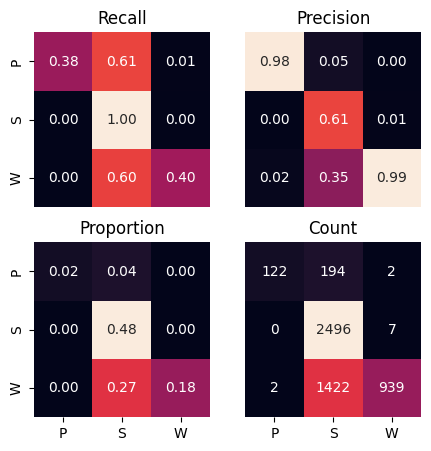

In [294]:
loss,metrics,y_true,y_pred,y_logits = evaluate(trainloader,model,criterion)

cm_grid(y_true,y_pred)
metrics

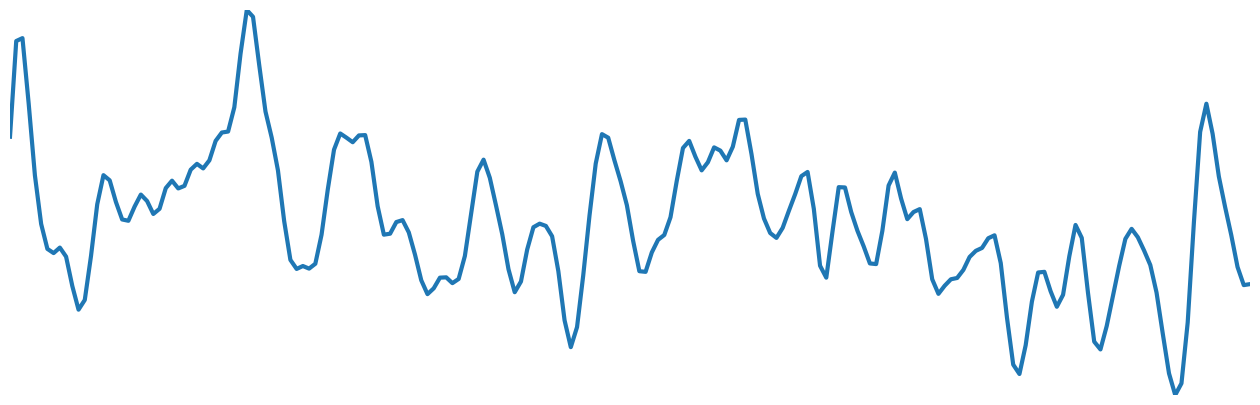

In [19]:
plt.figure(figsize=(16,5))
plt.plot(X[0,:200],linewidth=3)
plt.axis('off')
plt.margins(x=0,y=0)
plt.savefig('out.svg',bbox_inches='tight')

In [82]:
y[155:165]

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

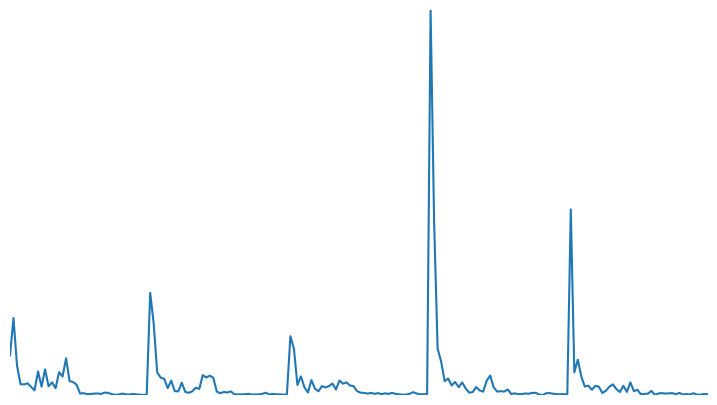

In [306]:
plt.figure(figsize=(9,5))
# plt.plot(X[155:160].flatten())
plt.plot(df.iloc[0:5].to_numpy().flatten())
# plt.gca().spines[['right', 'top','left']].set_visible(False)
plt.axis('off')
plt.yticks([])
plt.xticks([0,5000,10000,15000,20000,25000,30000,35000,40000,45000])
# plt.ylim([-.00025,.00025])
plt.margins(x=0,y=0)
plt.savefig('out.svg',bbox_inches='tight')